Harvey Model = $4 \sigma^2 \tau / (1 + (2\pi \nu \tau)^2 + (2\pi \nu \tau)^4)$   
In pySYD:  
a=p[0],b=p[1]   
Model = $p[0]/(1.+(p[1]*x)^4+(p[1]*x)^2)$   
So    
$a=4 \sigma^2 \tau$    
$b=2\pi* \tau$    

### Can run in notebook_env

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.edgecolor'] = 'white'

In [3]:
%matplotlib inline

In [4]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
## for this record this now lives in /Onedrive(etc)/work/datatables ##
highmass_rc_newvals

,KIC,numax,new_numax,smooth_numax,Delnu,o_Teff,o_log(g),o_[Fe/H],g_Teff,g_Teff_e,...,a_log(g),a_log(g)_e,a_[Fe/H],a_[Fe/H]_e,L_Teff,L_Teff_e,L_log(g),L_log(g)_e,L_[Fe/H],L_[Fe/H]_e
0,3347458,39.99,40.32,41.422682,3.360,5000,2.519,0.18,NaN,NaN,...,2.525,0.039,0.165,0.007,NaN,NaN,NaN,NaN,NaN,NaN
1,8378545,48.82,48.07,48.952072,3.952,5058,2.608,0.22,NaN,NaN,...,3.142,0.059,0.157,0.007,5009.00,32.00,2.761,0.053,0.323,0.030
2,5978324,49.10,48.78,50.072904,4.024,5051,2.610,-0.07,NaN,NaN,...,2.701,0.050,-0.098,0.008,NaN,NaN,NaN,NaN,NaN,NaN
3,10068490,66.42,58.84,60.906533,5.206,5189,2.747,-0.14,5740.95,4.38,...,2.769,0.062,-0.201,0.010,5254.75,37.05,2.699,0.061,-0.216,0.035
4,4756133,80.81,80.29,83.967767,5.865,5152,2.831,0.11,NaN,NaN,...,3.014,0.056,0.091,0.008,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.53,89.092562,6.760,4948,2.862,0.18,NaN,NaN,...,2.858,0.049,0.076,0.008,5099.89,22.44,2.974,0.034,0.085,0.018
111,3430048,35.82,33.63,37.856607,3.487,5079,2.474,0.17,NaN,NaN,...,2.502,0.039,0.106,0.007,NaN,NaN,NaN,NaN,NaN,NaN
112,7116721,50.86,50.97,53.768334,4.522,5028,2.624,-0.26,NaN,NaN,...,NaN,NaN,NaN,NaN,4798.39,26.51,2.677,0.044,0.049,0.025
113,7347076,90.59,90.65,94.236618,7.216,5386,2.890,-0.17,NaN,NaN,...,NaN,NaN,NaN,NaN,5076.47,46.21,2.915,0.076,-0.007,0.044


In [5]:
# output_file = open('../../pysyd-work/info/todo.txt','w')
# # output_file.write(str(len(xq))+'\t'+str(len(elements_dict.keys()))+'\n')

# for i in range(0,len(highmass_rc)):
#     output_file.write(str(highmass_rc['KIC'][i])+'\n')
    
# output_file.close()

print('id | a1 | a1_sig | a2 | a2_sig | a3 | a3_sig | b1 | b1_sig | b2 | b2_sig | b3 | b3_sig | whitenoise | whitenoise_sig')

seis_file = open('../data/JieBGfits/3347458.seis','r') #2158410
# print(seis_file.readlines()[9:11])
seis_file_read = seis_file.readlines()
key_line = seis_file_read[9]
data_line = seis_file_read[10]
print(key_line)
# print(data_line)
print(data_line.split())
seis_file.close()

id | a1 | a1_sig | a2 | a2_sig | a3 | a3_sig | b1 | b1_sig | b2 | b2_sig | b3 | b3_sig | whitenoise | whitenoise_sig
#id|numax|a_i|a_i_sig|b_i|b_i_sig|b2|b2_sig|whitenoise

['3347458', '6170.5631', '494.36326', '27536.265', '155527.43', '115.01863', '354.53875', '0.034685678', '0.0019159402', '0.24321178', '0.23672830', '0.24478977', '0.23537482', '241.03068', '17.806047']


In [6]:
bg_params = data_line.split()
n_harveys = int((len(bg_params)-3)/4)
print('Fit has',n_harveys,'Harvey Models')

tau_list = []
sigma_list = []
for i in range(0,n_harveys):
#     a = float(bg_params[4*i+1])
#     b = float(bg_params[4*i+3])
    a = float(bg_params[2*i+1])
    b = float(bg_params[(2*i)+1+(2*n_harveys)])
#     print(a,b)
    tau = b/(2*np.pi)
    sigma = np.sqrt(a/(4*tau))
    tau_list.append(tau)
    sigma_list.append(sigma)
    print('tau:',tau)
    print('sigma:',sigma)

Fit has 3 Harvey Models
tau: 0.005520397108193806
sigma: 528.6244464247026
tau: 0.038708357005178565
sigma: 421.71607098071854
tau: 0.038959501913828146
sigma: 27.167357738508937


Harvey Model = $4 \sigma^2 \tau / (1 + (2\pi \nu \tau)^2 + (2\pi \nu \tau)^4)$   
In pySYD:  
a=p[0],b=p[1]   
Model = $p[0]/(1.+(p[1]*x)^4+(p[1]*x)^2)$   
So    
$a=4 \sigma^2 \tau$    
$b=2\pi \tau$    

In [47]:
pysyd_file = pd.read_csv('../pysyd-work/results/3347458/global_1.csv')
print(pysyd_file)

a1 = pysyd_file['value'][6]*pysyd_file['value'][7]**2*4*1e-6
b1 = pysyd_file['value'][6]*2*np.pi*1e-6
a2 = pysyd_file['value'][9]*pysyd_file['value'][10]**2*4*1e-6
b2 = pysyd_file['value'][9]*2*np.pi*1e-6
white = pysyd_file['value'][8]

print(a1,b1,a2,b2,white)

       parameter         value
0   numax_smooth     40.291621
1       A_smooth   1642.637686
2    numax_gauss     39.383875
3        A_gauss   1817.146458
4           FWHM      8.541622
5            dnu      3.362861
6          tau_1  16787.997013
7        sigma_1    429.951297
8          white     22.316907
9          tau_2   5064.007725
10       sigma_2    486.553634
12413.590122562833 0.10548209616982351 4795.300109589595 0.0318180989330091 22.316907060816497


In [134]:
# pysyd_file = pd.read_csv('../../pysyd-work/backup_results/3347458/global_5.csv')
# print(pysyd_file)

# aa1 = pysyd_file['value'][6]*pysyd_file['value'][7]**2*4*1e-6
# bb1 = pysyd_file['value'][6]*2*np.pi*1e-6
# aa2 = pysyd_file['value'][8]*pysyd_file['value'][9]**2*4*1e-6
# bb2 = pysyd_file['value'][8]*2*np.pi*1e-6

# print(aa1,bb1,aa2,bb2)

In [11]:
powerspec = pd.read_csv('../data/highmass_rc/KIC3347458_PS.csv')
powerspec

,freq,power,amp
0,0.007871,4.748544,2.179115
1,0.008658,3.647968,1.909965
2,0.009445,2.434887,1.560413
3,0.010232,1.153953,1.074222
4,0.011019,0.190294,0.436227
...,...,...,...
339206,266.996725,0.893173,0.945078
339207,266.997512,0.995985,0.997990
339208,266.998299,1.025415,1.012628
339209,266.999086,0.976264,0.988061


In [12]:
def harvey_tau(nu,tau,sigma):
    numer = 4*sigma**2*tau
    denom = 1 + (2*np.pi*nu*tau)**2 + (2*np.pi*nu*tau)**4
    return numer/denom

def harvey_ab(nu,a,b):
    numer = a
    denom = 1 + (b*nu)**2 + (b*nu)**4
    return numer/denom
    

In [43]:
emcee = pd.read_csv('../data/emcee_fits/KIC3347458.csv',names=['param','value','error'])
emcee

,param,value,error
0,amp1,14157.980409,231.738515
1,nu_char1,10.431661,0.177845
2,amp2,3684.207318,121.808783
3,nu_char2,34.848769,0.292712
4,wn,19.635605,0.066186
5,pe_amp,1729.167744,23.548400
6,numax,38.884680,0.124120
7,pe_width,7.483388,0.094052
8,smooth_numax,41.606077,NaN


In [44]:
emcee['value'][emcee['param']=='amp1'].values[0]

14157.980409310963

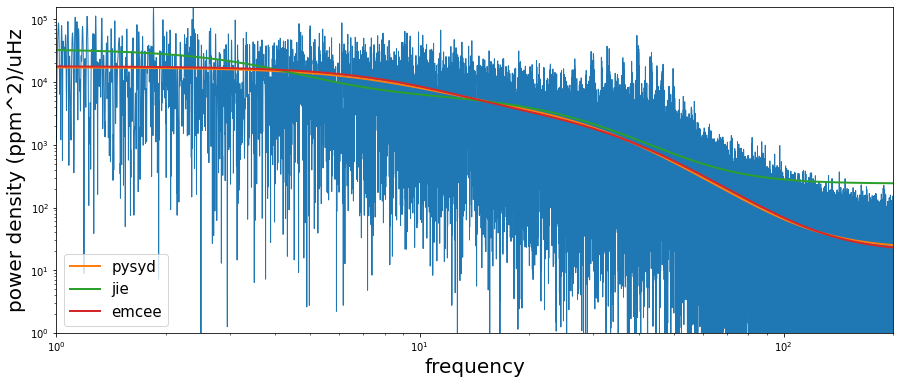

In [46]:
plt.figure(figsize=(15,6))

plt.plot(powerspec['freq'],powerspec['power']*110.079)

pysydharvey = harvey_ab(powerspec['freq'],a1,b1) + harvey_ab(powerspec['freq'],a2,b2) + white
plt.plot(powerspec['freq'],pysydharvey,label='pysyd',linewidth=2)

jieharvey = harvey_tau(powerspec['freq'],tau_list[0],sigma_list[0])
for i in range(1,len(tau_list)):
    jieharvey = jieharvey + harvey_tau(powerspec['freq'],tau_list[i],sigma_list[i])
jieharvey = jieharvey + float(bg_params[-2])
plt.plot(powerspec['freq'],jieharvey,label='jie',linewidth=2)

emcee_harvey = harvey_ab(powerspec['freq'],emcee['value'][0],1/emcee['value'][1]) + \
                harvey_ab(powerspec['freq'],emcee['value'][2],1/emcee['value'][3]) + \
                emcee['value'][4]
plt.plot(powerspec['freq'],emcee_harvey,label='emcee',linewidth=2)

# pysydharvey_old = harvey_ab(powerspec['freq'],aa1,bb1) + harvey_ab(powerspec['freq'],aa2,bb2)
# plt.plot(powerspec['freq'],pysydharvey_old*110.079,linestyle=':',label='pysyd_old')

# plt.xlim(0,100)
plt.xlim(1,200)
# plt.xlim(10,200)
# plt.xlim(20,80)
plt.ylim(bottom=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency')
plt.ylabel('power density (ppm^2)/uHz')
plt.legend(loc='lower left',fontsize=15)
# plt.savefig('../bg_powerdensity')
plt.show()

In [81]:
def harvey_emcee(nu,a,b):
    b = 1/b
    numer = a
    denom = 1 + (b*nu)**2 + (b*nu)**4
    return numer/denom

In [94]:
bad_emcee_list = [4756133,5978324,7581399,7901207,8365782,8378545,8621290,9266192,9286851,10068490,
                 10162765,10384595,10736390]

emcee_list = [2158410,3120567,3347458,3430048,3660976,3955502,4179377,4348593,4370592,
             4651366,4940935,5097690,5106376,7052311,7175316,7988900,8508931,8569885,9226335,
             9245283,9612933,9786910,9846437,10600807,10918449,10989210,11045134,11297585,11413158,
             11619724,12164879,12603148]

emcee fit:
           param        value        error
0          amp1  9550.266321   669.209664
1      nu_char1    14.593094     5.293469
2          amp2  1806.009554  1788.749922
3      nu_char2    47.898556     5.584181
4            wn    40.728762     1.275927
5        pe_amp  1341.657225    64.887894
6         numax    45.923919    18.561718
7      pe_width     9.585499     2.821428
8  smooth_numax    50.791528          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.60964440e+03 1.32306200e+05 1.32306200e+05 3.93554119e+01
 2.44702287e+00 2.44663534e+00 3.81856000e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [8318.384779964223, 13.801919287984227, 2458.742962245633, 42.28004640489894, 46.00562927982897]
Pysyd numax: 46.83241728153084
Jie numax: 49.27
Emcee numax: 45.92391858742873


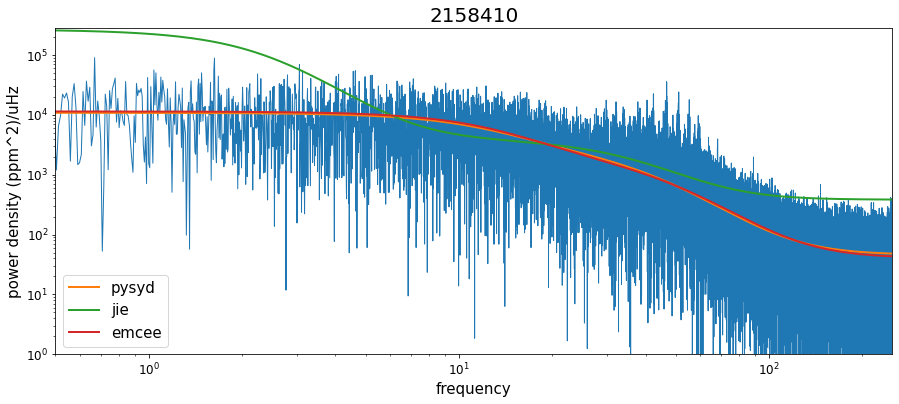

emcee fit:
           param        value       error
0          amp1  6062.553433  239.534562
1      nu_char1    13.664057    0.656765
2          amp2  1118.740225   79.066901
3      nu_char2    59.234557    1.365207
4            wn    38.095566    0.524215
5        pe_amp   659.545102   21.439883
6         numax    67.204816    0.430292
7      pe_width    12.298638    0.315033
8  smooth_numax    74.129026         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.78304420e+03 6.89586300e+04 6.89586300e+04 4.92233273e+01
 4.04085057e+00 4.04105747e+00 2.36960320e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [4040.4439035052255, 16.787088101770397, 1061.5031565819734, 57.18614909641477, 42.524729562761834]
Pysyd numax: 65.17183397739494
Jie numax: 65.72
Emcee numax: 67.20481601499483


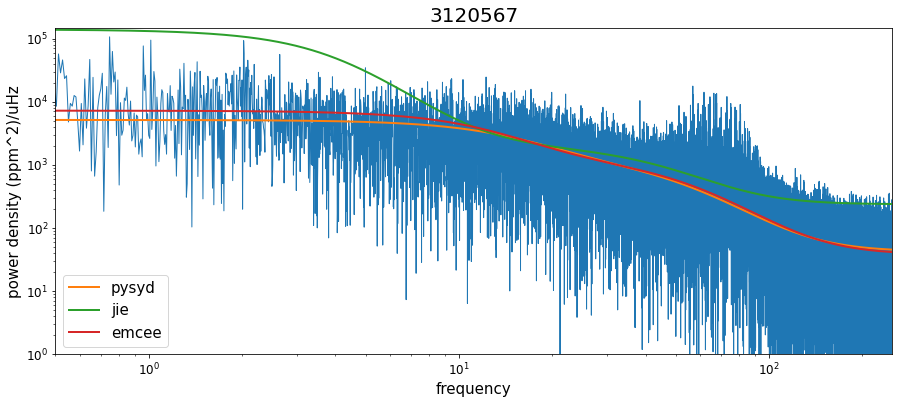

emcee fit:
           param         value       error
0          amp1  14216.512149  727.868980
1      nu_char1     10.485222    0.633308
2          amp2   3656.631563  452.107577
3      nu_char2     34.933694    1.151742
4            wn     19.587441    0.219367
5        pe_amp   1734.378523   74.641861
6         numax     38.818051    0.444235
7      pe_width      7.521681    0.323117
8  smooth_numax     41.771367         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [6.17056310e+03 2.75362650e+04 1.15018630e+02 2.88303432e+01
 4.11164295e+00 4.08513803e+00 2.41030680e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [12413.590122562833, 9.480281832757905, 4795.300109589595, 31.428653299036938, 22.316907060816497]
Pysyd numax: 40.29162051394859
Jie numax: 39.99
Emcee numax: 38.81805116277342


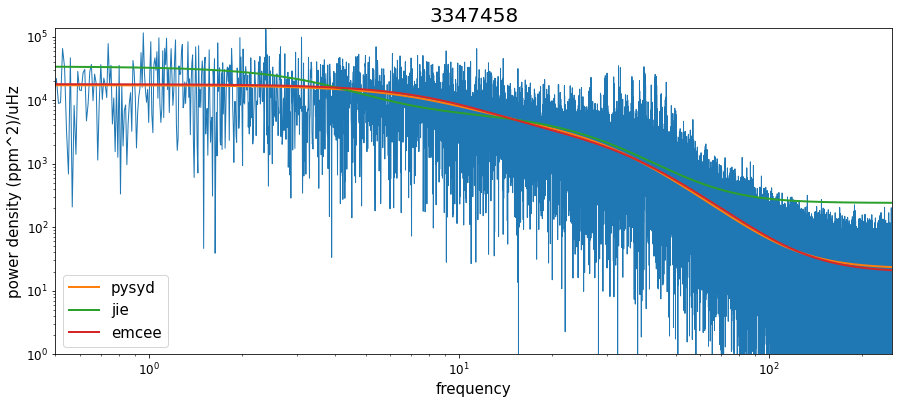

emcee fit:
           param         value        error
0          amp1  23266.024994  1338.264577
1      nu_char1     10.104372     0.644154
2          amp2   5051.665555   766.990477
3      nu_char2     35.154379     1.424096
4            wn     58.131627     0.556032
5        pe_amp   4762.516717   193.388988
6         numax     35.059048     0.356352
7      pe_width      7.078392     0.249717
8  smooth_numax     37.217196          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [7.31427150e+03 4.77336670e+05 4.77336670e+05 3.13709074e+01
 2.15169867e+00 2.15182531e+00 6.51539810e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [19619.98577551478, 9.306700952272564, 6797.601520023178, 31.81917657870884, 60.49040242406751]
Pysyd numax: 33.626874965575276
Jie numax: 35.82
Emcee numax: 35.05904750841485


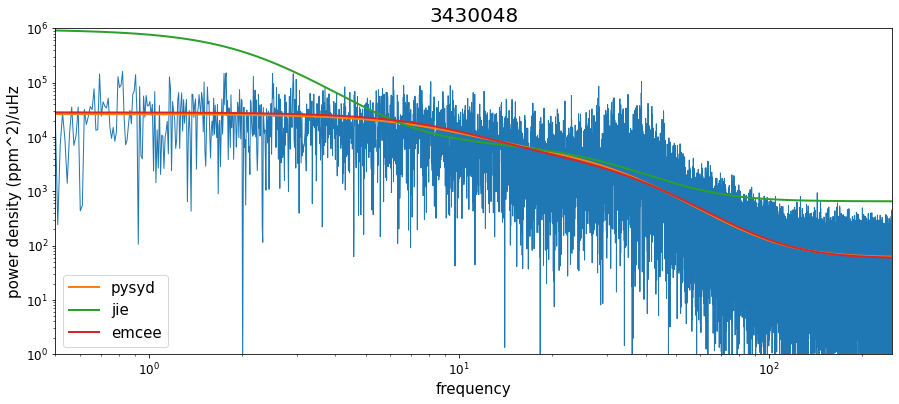

emcee fit:
           param         value       error
0          amp1  13746.273015  782.706827
1      nu_char1     11.607553    0.764911
2          amp2   3586.706509  471.240533
3      nu_char2     37.441624    1.346342
4            wn     38.771883    0.432197
5        pe_amp   2256.773180  112.330745
6         numax     39.843521    0.385236
7      pe_width      6.831421    0.245665
8  smooth_numax     42.526983         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [4.29070780e+03 1.17943490e+05 1.17943490e+05 3.41439098e+01
 2.29775061e+00 2.29764650e+00 3.09535230e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [11684.41808758692, 10.580550007201975, 4735.6630776232805, 33.13631201169827, 44.110559281985275]
Pysyd numax: 40.228652579844955
Jie numax: 40.03
Emcee numax: 39.84352129829328


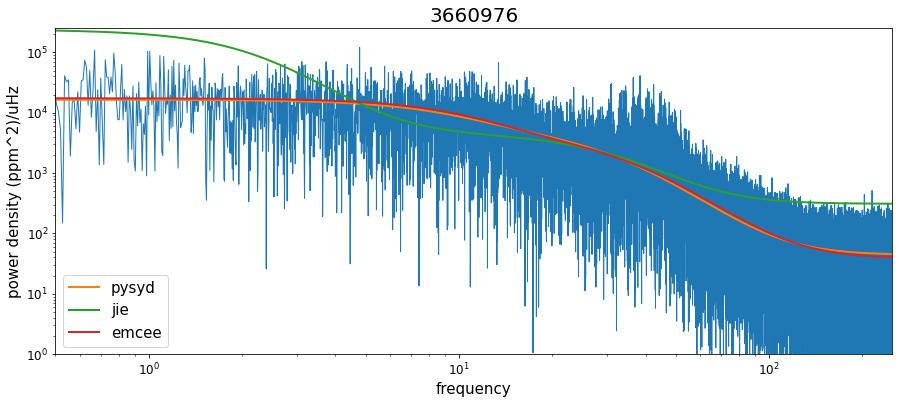

emcee fit:
           param         value        error
0          amp1  34233.307035  2815.909792
1      nu_char1      4.876098     0.395839
2          amp2   9653.189916   645.446191
3      nu_char2     23.616336     0.449396
4            wn     59.978626     0.478856
5        pe_amp   2819.966148   210.573514
6         numax     25.833920     0.315680
7      pe_width      4.363611     0.309352
8  smooth_numax     26.959783          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.00354730e+04 2.12287020e+02 9.34485330e+03 2.42973486e+01
 1.85800387e+00 6.10824332e+00 5.82930760e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [29197.826382135005, 4.938489222407173, 10249.129372827101, 22.773942245227772, 63.262043190694]
Pysyd numax: 24.714562592084786
Jie numax: 24.68
Emcee numax: 25.83391996525026


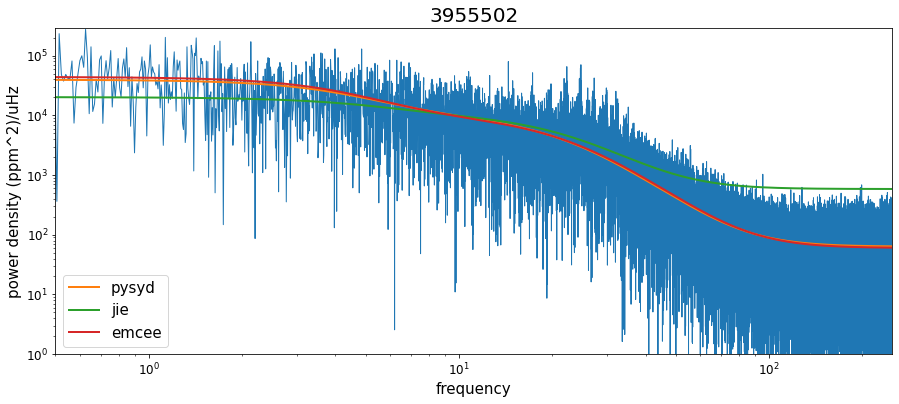

emcee fit:
           param         value        error
0          amp1  20179.928490  1947.574889
1      nu_char1      6.699424     0.845768
2          amp2   8211.776353  1021.321185
3      nu_char2     24.665640     0.788563
4            wn     70.842397     0.664946
5        pe_amp   2107.149519   190.859907
6         numax     27.217568     0.612161
7      pe_width      4.902755     0.452154
8  smooth_numax     28.862211          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [8.30090750e+03 3.60224030e+05 3.60224030e+05 2.28970617e+01
 1.50272837e+00 1.50266022e+00 3.36556080e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [19102.91527653684, 5.895565216554801, 9607.609992662141, 23.195145559959617, 73.30370155278874]
Pysyd numax: 25.89714968952792
Jie numax: 25.91
Emcee numax: 27.21756757944792


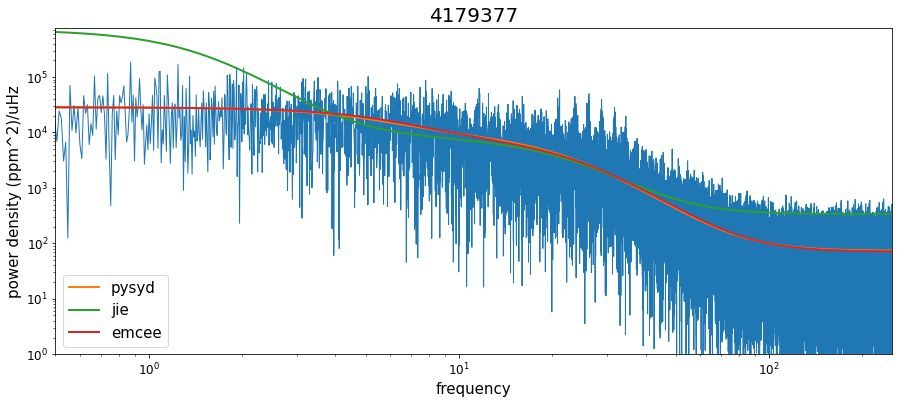

emcee fit:
           param         value       error
0          amp1  10702.455207  461.773853
1      nu_char1     11.104421    0.510786
2          amp2   1826.312906   93.390745
3      nu_char2     55.098627    0.839615
4            wn     16.545093    0.289609
5        pe_amp    537.927787   23.935420
6         numax     63.594688    0.535269
7      pe_width     11.213117    0.395266
8  smooth_numax     69.925912         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.69155260e+03 5.57871950e+04 5.57871950e+04 3.25229165e+01
 2.60500705e+00 2.60407654e+00 3.62268850e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [7131.971182828757, 12.550606775024537, 1998.6471472246083, 51.170558356521646, 20.183381908475685]
Pysyd numax: 61.70072309869121
Jie numax: 61.36
Emcee numax: 63.59468798822819


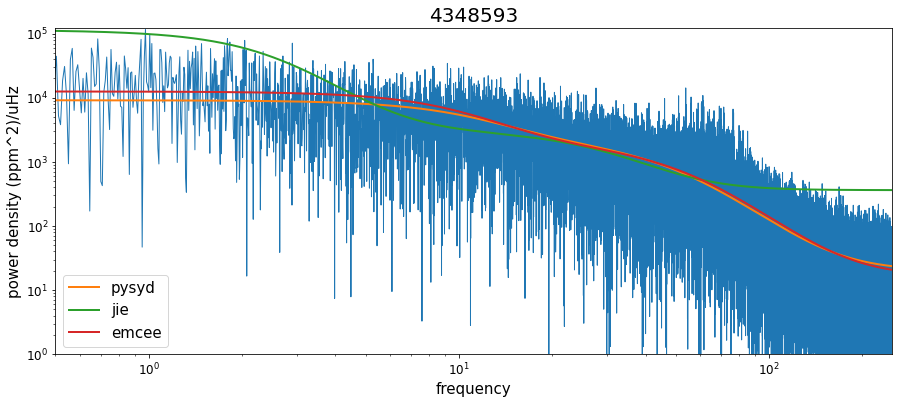

emcee fit:
           param        value       error
0          amp1  9960.964746  473.608392
1      nu_char1    11.320157    0.751206
2          amp2  2443.450263  200.538807
3      nu_char2    45.329703    1.011685
4            wn    13.671255    0.197808
5        pe_amp  1178.992077   46.334459
6         numax    51.103771    0.377865
7      pe_width     8.906544    0.276421
8  smooth_numax    53.065988         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.50597180e+03 6.35817940e+04 6.35817940e+04 4.33949124e+01
 2.99362827e+00 2.99320103e+00 1.70347770e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6514.126140419924, 12.02053604101003, 2837.0898726800797, 41.31271367383116, 16.989415339458375]
Pysyd numax: 50.026897280838746
Jie numax: 50.38
Emcee numax: 51.103770676814094


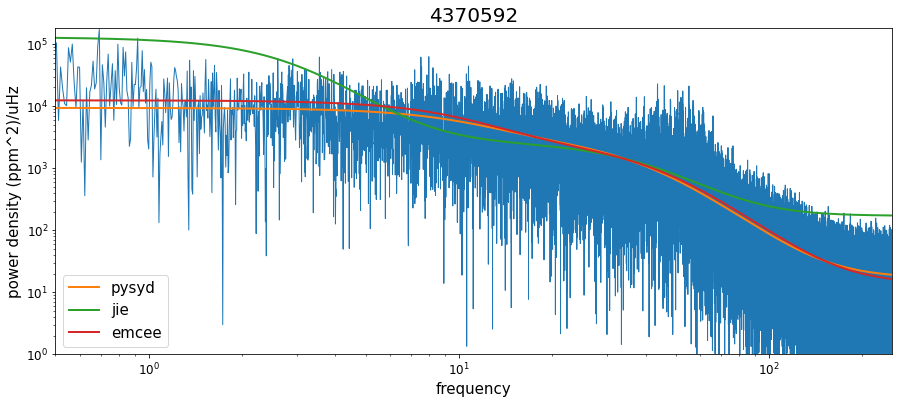

emcee fit:
           param        value       error
0          amp1  7552.382970  300.171664
1      nu_char1    15.900213    1.009561
2          amp2  1724.152279  275.303304
3      nu_char2    51.611203    2.241761
4            wn    37.257737    0.461094
5        pe_amp  1408.492164   49.394484
6         numax    53.555044    0.442800
7      pe_width     9.954946    0.293710
8  smooth_numax    56.867933         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.83526590e+03 7.54051500e+04 7.54051500e+04 4.48657095e+01
 2.96905723e+00 2.96962390e+00 1.41562860e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6286.789953423985, 13.698754003041719, 2625.5191321969, 44.41090645885666, 41.590708030221975]
Pysyd numax: 52.625467387766896
Jie numax: 53.24
Emcee numax: 53.55504384843426


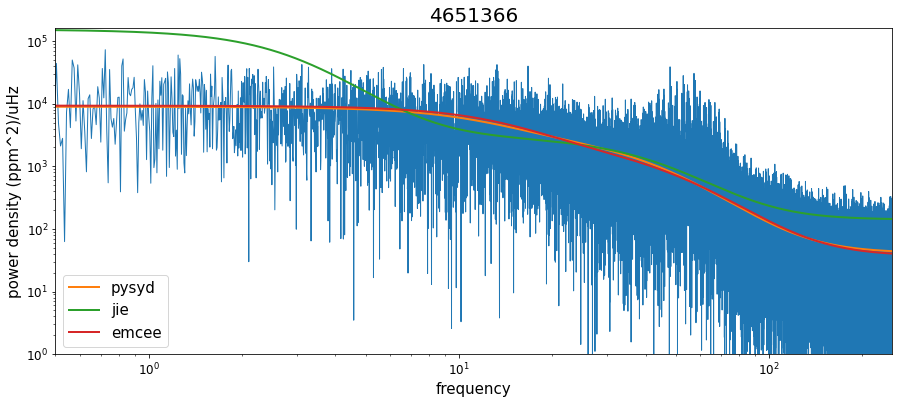

emcee fit:
           param         value        error
0          amp1  17274.595182  1751.319856
1      nu_char1      4.472885     0.455059
2          amp2   4104.526532   166.336260
3      nu_char2     34.769627     0.435991
4            wn     16.669225     0.175990
5        pe_amp   1179.675475    57.869035
6         numax     42.576221     0.311018
7      pe_width      6.587100     0.253819
8  smooth_numax     45.203120          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.03824460e+03 6.71797290e+04 6.71797290e+04 3.70877153e+01
 2.61665684e+00 2.61678290e+00 1.60313410e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [13778.26993538967, 4.3193857761534, 4539.899817657654, 32.50735244337166, 19.283060600120997]
Pysyd numax: 39.93742509426592
Jie numax: 40.49
Emcee numax: 42.57622055164599


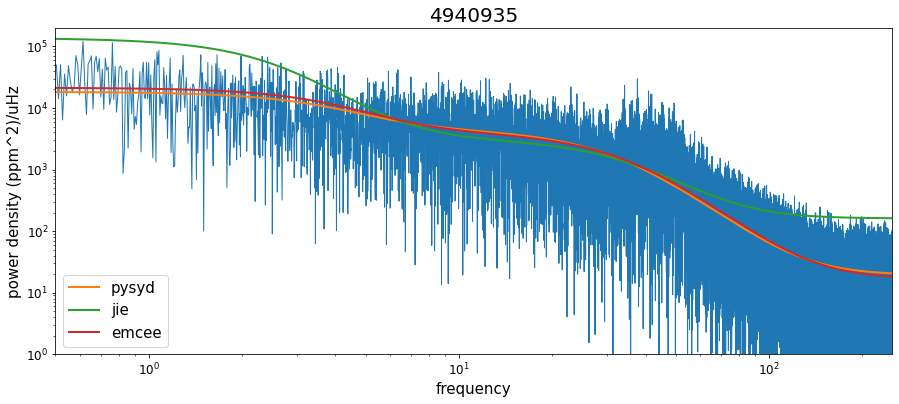

emcee fit:
           param        value       error
0          amp1  6268.505618  486.162719
1      nu_char1     8.432425    0.754546
2          amp2  2417.876497   96.357490
3      nu_char2    47.704248    0.588943
4            wn    16.455898    0.259691
5        pe_amp   814.107403   34.996154
6         numax    59.658589    0.405783
7      pe_width     9.423303    0.294275
8  smooth_numax    62.141499         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.53746280e+03 3.70560940e+04 3.70560940e+04 4.96238709e+01
 3.80929090e+00 3.80905062e+00 1.15312440e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [5308.115833447469, 7.984646837901114, 2608.3019215187883, 44.044933480724474, 20.263250535671997]
Pysyd numax: 59.040327415058826
Jie numax: 59.23
Emcee numax: 59.65858897821573


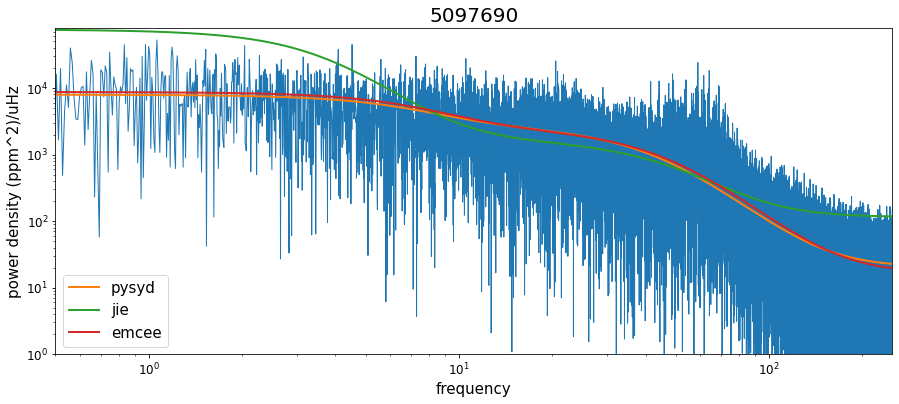

emcee fit:
           param        value        error
0          amp1  6504.182405  4018.676320
1      nu_char1    15.833317     7.191144
2          amp2  1384.378755   923.598502
3      nu_char2    56.991118     4.750839
4            wn    19.427330     0.809181
5        pe_amp   661.696275    39.111884
6         numax    60.919065    27.643503
7      pe_width    11.526651     0.616438
8  smooth_numax    67.265517          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.17773320e+03 6.62445840e+04 6.62445840e+04 4.85012648e+01
 3.89836951e+00 3.89870129e+00 2.18138880e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [5107.919197888162, 15.999228798985834, 1667.2552665981516, 51.2357693958611, 23.148645341422856]
Pysyd numax: 61.692852809398914
Jie numax: 63.66
Emcee numax: 60.9190651567485


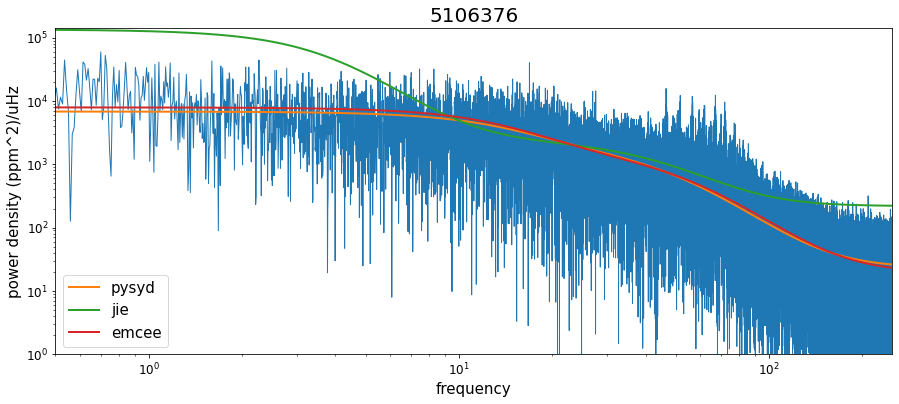

emcee fit:
           param        value       error
0          amp1  7188.522077  402.595445
1      nu_char1    14.775354    1.320951
2          amp2  1682.787392  309.143331
3      nu_char2    50.373501    2.445161
4            wn    18.582505    0.359913
5        pe_amp  1069.595846   51.026696
6         numax    52.831420    0.652302
7      pe_width     9.593422    0.469431
8  smooth_numax    56.765609         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.34634000e+03 6.25902900e+04 6.25902900e+04 4.43878470e+01
 3.08895460e+00 3.08892636e+00 1.14784770e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [5970.456272651384, 13.852124936753139, 2196.7617662760854, 44.911027365848156, 22.02953169012294]
Pysyd numax: 52.81436977580185
Jie numax: 53.71
Emcee numax: 52.831419980079865


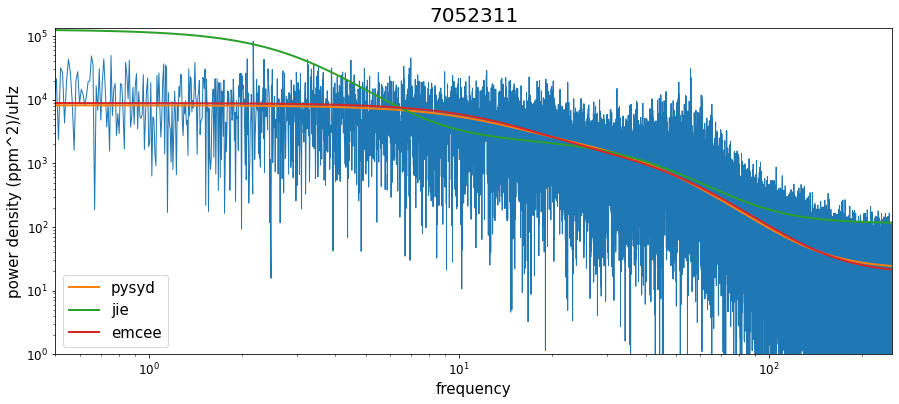

emcee fit:
           param         value       error
0          amp1  15046.580986  731.863304
1      nu_char1      9.965576    0.586634
2          amp2   2875.903409  280.141812
3      nu_char2     40.889864    1.122610
4            wn     14.650672    0.174396
5        pe_amp    964.534845   50.329682
6         numax     43.796720    0.781272
7      pe_width     10.470683    0.571005
8  smooth_numax     47.123639         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.17340160e+03 9.98617650e+04 9.98617650e+04 3.95717968e+01
 2.84384641e+00 2.84374451e+00 2.45631440e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [12325.811278579245, 8.71008614148234, 4202.004136712268, 35.34188228023543, 18.192485536285353]
Pysyd numax: 41.48800725905708
Jie numax: 43.3
Emcee numax: 43.79671987926665


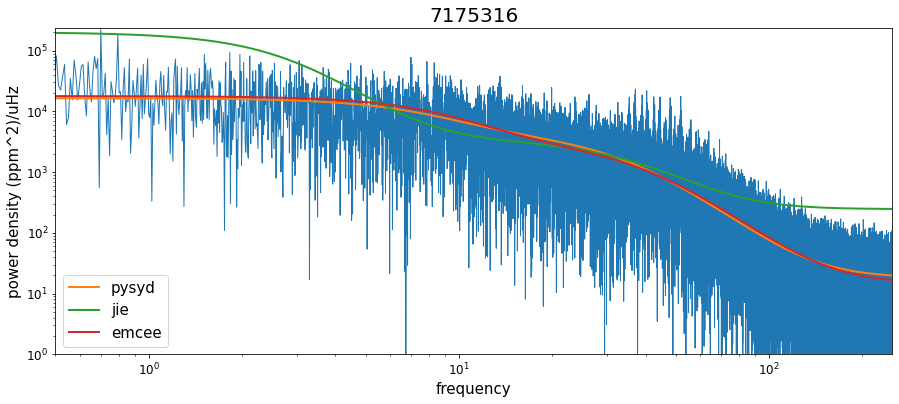

emcee fit:
           param        value       error
0          amp1  8464.123275  545.543352
1      nu_char1    11.695134    0.926203
2          amp2  2708.747804  323.064788
3      nu_char2    41.031823    1.281254
4            wn    14.216905    0.204460
5        pe_amp  1378.470011   60.374709
6         numax    45.733208    0.512899
7      pe_width     8.206624    0.322022
8  smooth_numax    50.091005         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.96472040e+03 6.28208150e+04 6.28208150e+04 3.84789724e+01
 3.20423728e+00 3.20400229e+00 1.09904110e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6889.084064079864, 11.491968873320046, 3173.8430376658703, 37.73581251089203, 16.959103849384537]
Pysyd numax: 47.73757794996813
Jie numax: 47.3
Emcee numax: 45.733208361119566


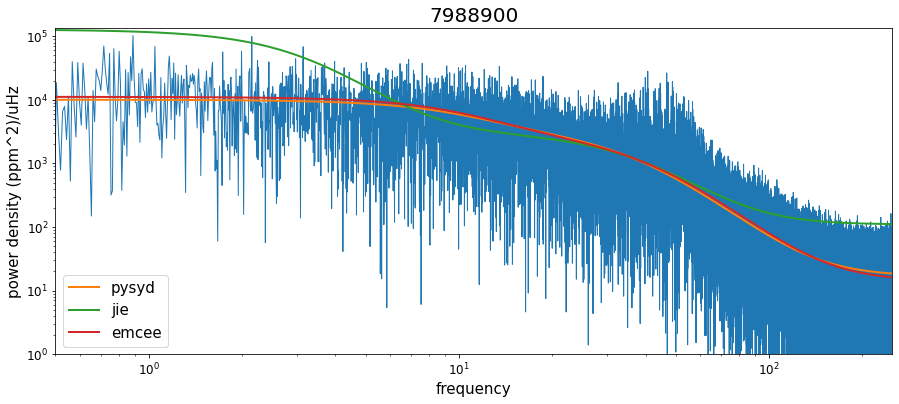

emcee fit:
           param        value        error
0          amp1  8098.414614  4135.796946
1      nu_char1    14.146820     6.847929
2          amp2  2551.948342  1436.033599
3      nu_char2    47.305050     2.657074
4            wn    18.607697     1.676442
5        pe_amp  1359.447965   805.892002
6         numax    57.365860    25.884713
7      pe_width     9.432993     2.795038
8  smooth_numax    62.251855          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.89842340e+03 4.31455490e+04 4.31455490e+04 4.77184588e+01
 3.08570833e+00 3.08587972e+00 3.15729500e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6870.361015168246, 15.698427537477416, 2323.3305637017734, 48.091613449976315, 18.64128678731178]
Pysyd numax: 59.49215469580683
Jie numax: 60.03
Emcee numax: 57.365860448640376


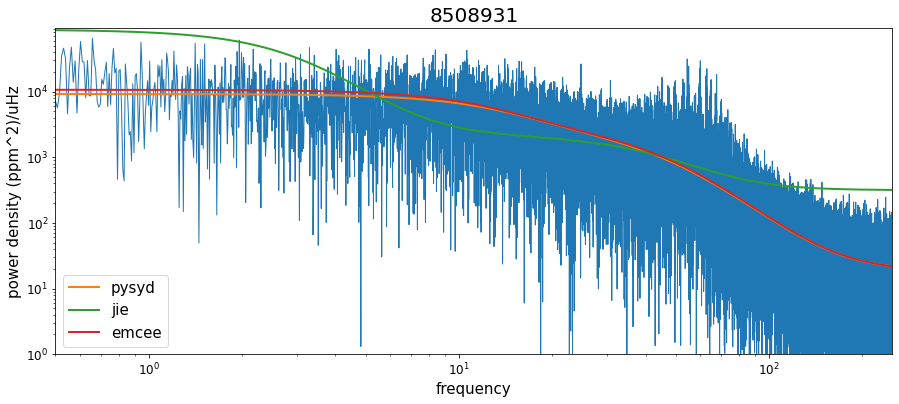

emcee fit:
           param        value       error
0          amp1  9761.418670  699.848148
1      nu_char1     8.310306    0.843817
2          amp2  3338.419676  217.703959
3      nu_char2    40.882354    0.733735
4            wn    12.819271    0.170434
5        pe_amp  1110.163709   48.920434
6         numax    47.294694    0.374903
7      pe_width     8.688882    0.305635
8  smooth_numax    46.053184         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.08276930e+03 6.82010600e+04 6.82010600e+04 3.91252609e+01
 2.52127095e+00 2.52205817e+00 1.73334200e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6480.58342749364, 7.543473267595866, 4234.021707972279, 36.0749717500495, 16.65502661639228]
Pysyd numax: 44.927632172770096
Jie numax: 45.32
Emcee numax: 47.2946944384895


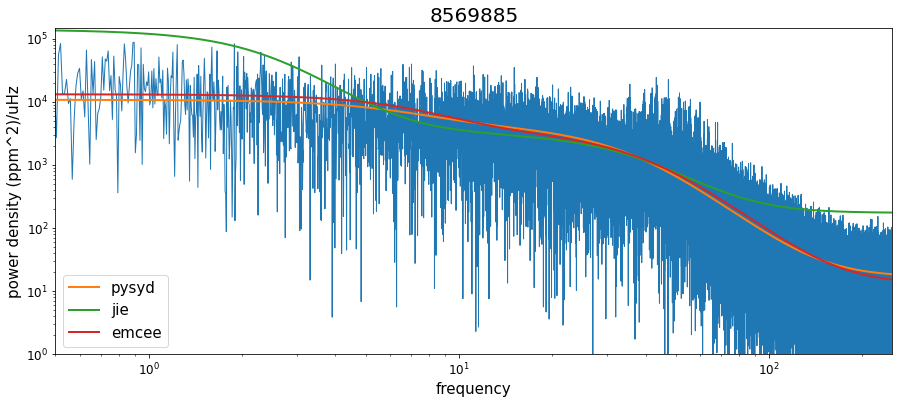

emcee fit:
           param        value        error
0          amp1  8578.075360  2862.104206
1      nu_char1    14.397569     6.420137
2          amp2  1850.381194  1891.593988
3      nu_char2    49.610078     4.930080
4            wn    15.455019     1.304952
5        pe_amp  1538.247279    62.021428
6         numax    52.300651    23.596282
7      pe_width    10.531733     2.528744
8  smooth_numax    57.670770          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.64290090e+03 6.84610360e+04 6.84610360e+04 4.55306520e+01
 2.21594671e+00 2.21563789e+00 1.65487360e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [7012.656898059031, 12.24462243689585, 2907.8692189277735, 42.08930346981887, 19.33980802540071]
Pysyd numax: 50.4215849562916
Jie numax: 51.09
Emcee numax: 52.300650878286895


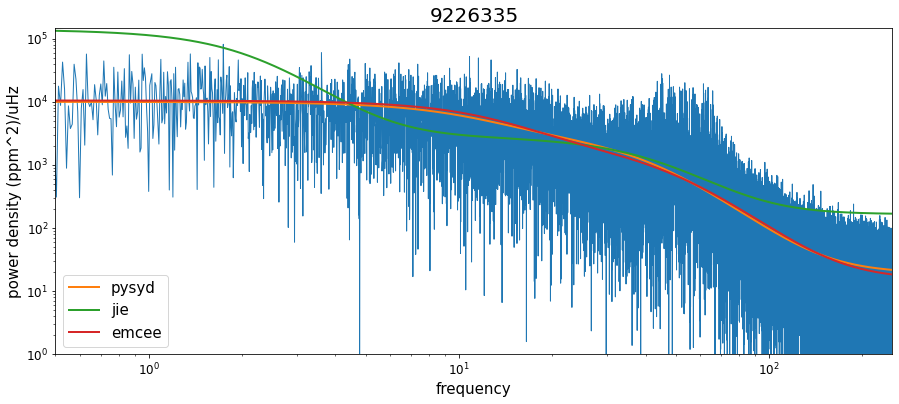

emcee fit:
           param         value       error
0          amp1  11273.027871  696.211714
1      nu_char1      8.564271    0.691875
2          amp2   3819.613469  265.145677
3      nu_char2     35.748404    0.653335
4            wn     15.874582    0.176466
5        pe_amp   1724.882218   70.132031
6         numax     42.279717    0.322239
7      pe_width      6.918681    0.219400
8  smooth_numax     44.486856         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.44140900e+03 9.47952990e+04 9.47952990e+04 3.73781584e+01
 2.51518992e+00 2.51496916e+00 1.70774110e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [11532.041497112989, 6.417274646066031, 4729.270226312427, 32.2882414825355, 18.730940494136156]
Pysyd numax: 42.31446186353055
Jie numax: 42.34
Emcee numax: 42.27971736460295


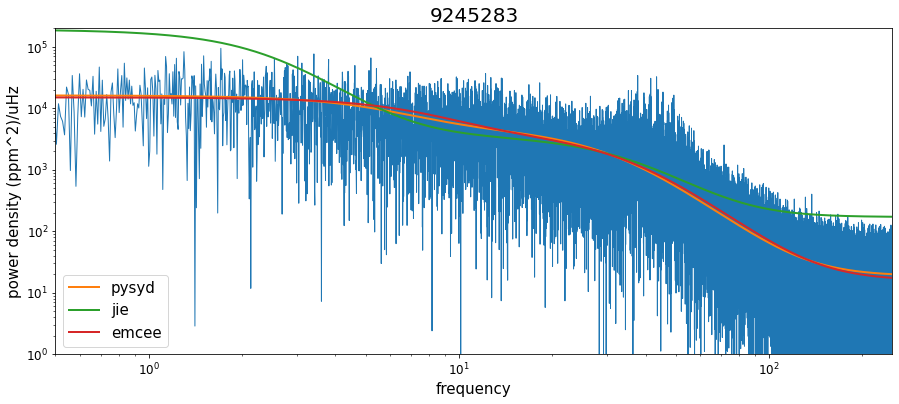

emcee fit:
           param         value       error
0          amp1  10024.006583  455.850813
1      nu_char1     11.702812    0.600662
2          amp2   1925.027373  157.741390
3      nu_char2     48.604234    1.127194
4            wn     20.222301    0.277998
5        pe_amp    491.427056   31.666335
6         numax     52.483630    0.780310
7      pe_width     10.362146    0.671365
8  smooth_numax     59.189872         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.53208820e+03 6.55050540e+04 6.55050540e+04 4.49653045e+01
 2.41331948e+00 2.41344890e+00 2.85118790e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [7520.781003981732, 12.799998826922382, 2058.6423894423133, 45.39219422864457, 23.87074455929575]
Pysyd numax: 52.46804314857063
Jie numax: 54.05
Emcee numax: 52.48362996677949


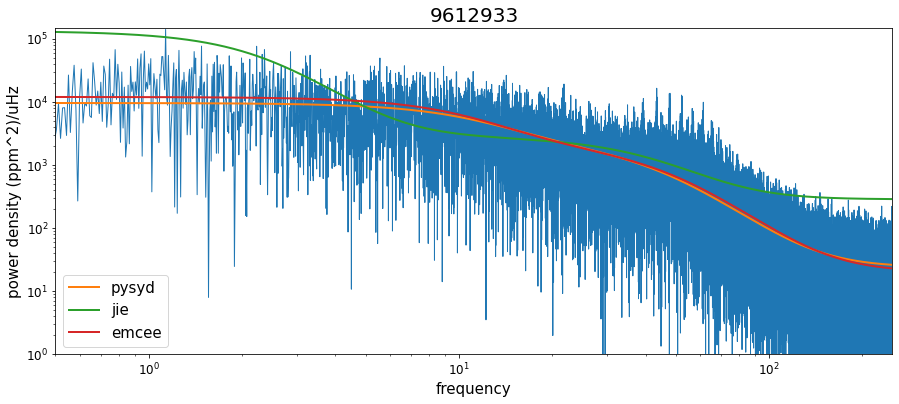

emcee fit:
           param         value        error
0          amp1  32314.222016  2644.324036
1      nu_char1      5.624563     0.589744
2          amp2  13689.899225  1455.226064
3      nu_char2     21.405848     0.601306
4            wn     43.000204     0.354045
5        pe_amp   5822.434019   351.106608
6         numax     23.839643     0.348398
7      pe_width      4.774920     0.233338
8  smooth_numax     25.509890          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.44031040e+04 4.52777110e+05 4.52777110e+05 2.06996558e+01
 1.27710990e+00 1.27711159e+00 3.33982750e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [32798.080258575326, 4.329108053439182, 17310.64341652151, 19.774899183742185, 45.50223588621844]
Pysyd numax: 22.361492545978273
Jie numax: 22.72
Emcee numax: 23.83964319636704


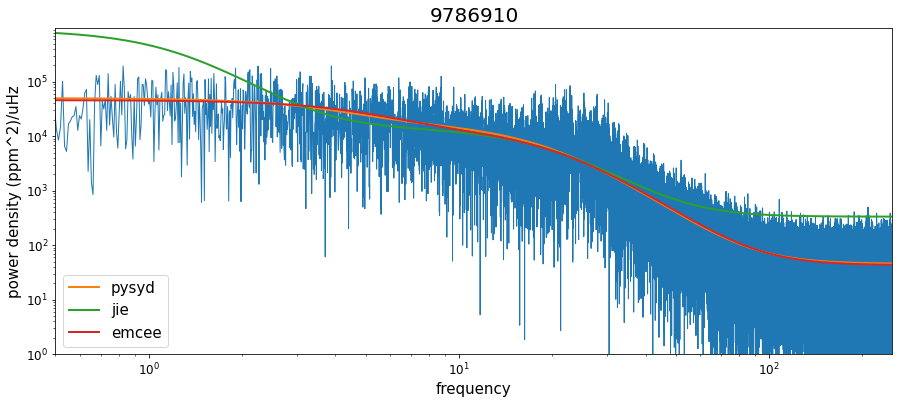

emcee fit:
           param          value         error
0          amp1  120134.951536  19278.088965
1      nu_char1       2.853637      0.491516
2          amp2   55398.681935   4948.038683
3      nu_char2      12.948602      0.313782
4            wn      95.255192      0.682648
5        pe_amp   25309.367155   1678.924681
6         numax      16.062701      0.175215
7      pe_width       2.449668      0.124290
8  smooth_numax      17.868308           NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.87096680e+04 1.49941080e+06 1.49941080e+06 1.29908740e+01
 6.14975023e-01 6.14773927e-01 5.14360840e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [107389.73359249927, 2.6594120382756463, 60442.63901423518, 12.452563033380875, 95.89676063533774]
Pysyd numax: 15.56421253249916
Jie numax: 15.11
Emcee numax: 16.062701211025676


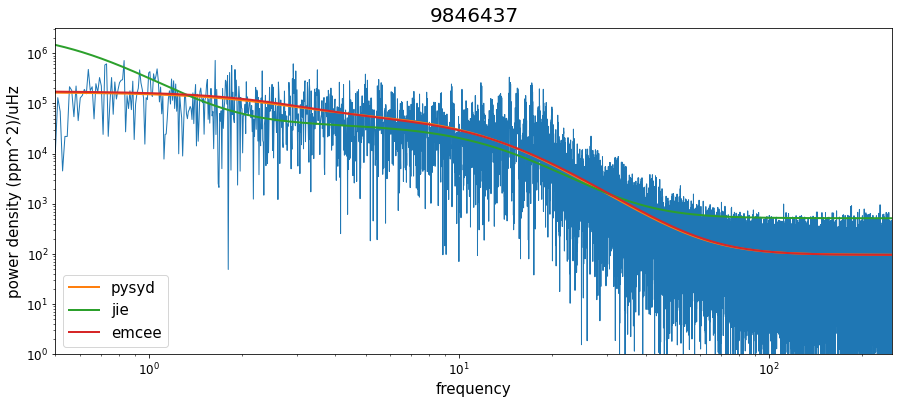

emcee fit:
           param        value       error
0          amp1  8391.752438  406.985663
1      nu_char1    11.980077    0.949532
2          amp2  2639.293450  216.546613
3      nu_char2    48.631215    1.109386
4            wn    17.753958    0.274054
5        pe_amp  1145.407698   42.059243
6         numax    56.888699    0.463371
7      pe_width    10.196130    0.305248
8  smooth_numax    64.636597         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.32070040e+03 6.69647690e+04 6.69647690e+04 5.39142588e+01
 3.41725566e+00 3.41695849e+00 3.71734300e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [5759.125812444077, 13.373885056501315, 2897.66128290996, 44.76401594573963, 21.76674039666684]
Pysyd numax: 53.30236636009951
Jie numax: 57.96
Emcee numax: 56.88869894491661


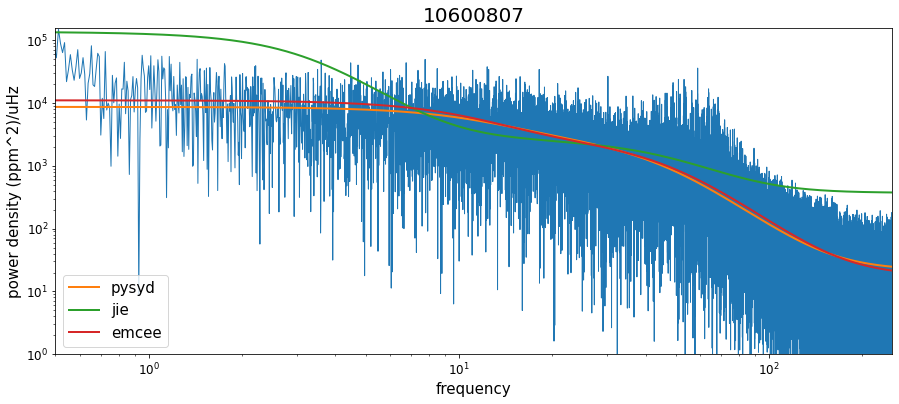

emcee fit:
           param         value       error
0          amp1  12894.507993  765.057438
1      nu_char1     10.580767    0.748941
2          amp2   3958.675035  424.552101
3      nu_char2     36.384944    1.047605
4            wn     16.594026    0.209725
5        pe_amp   1860.487784   87.551611
6         numax     40.456796    0.365415
7      pe_width      7.188507    0.262877
8  smooth_numax     43.235365         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [4.08174220e+03 8.16425780e+04 2.20365550e+02 3.21317639e+01
 2.19400700e+00 2.19204324e+01 3.59836640e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [10463.871083453569, 7.595660236820721, 6210.376374460882, 31.08788809245701, 19.705524904631645]
Pysyd numax: 38.599350484424846
Jie numax: 39.04
Emcee numax: 40.456796473988774


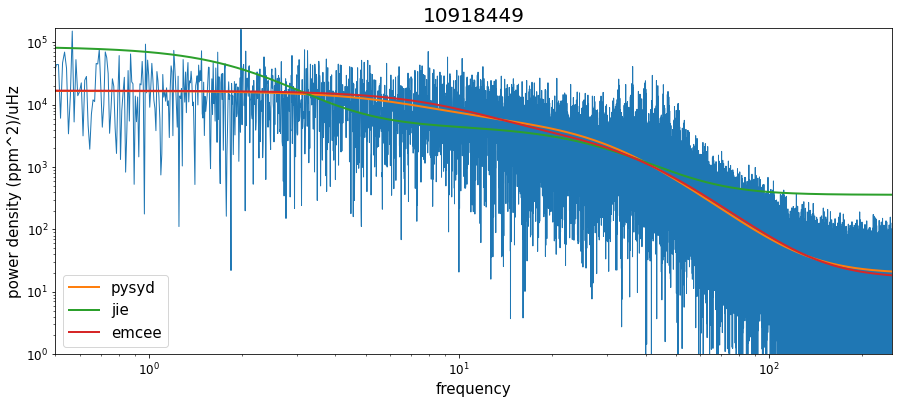

emcee fit:
           param        value       error
0          amp1  6444.506584  293.327195
1      nu_char1    16.236226    0.912194
2          amp2  1625.466353  230.671281
3      nu_char2    50.365901    1.833455
4            wn    12.554250    0.194519
5        pe_amp   805.927829   40.245985
6         numax    51.421860    0.567490
7      pe_width     9.562035    0.371610
8  smooth_numax    54.223273         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.53726780e+03 5.63335030e+04 5.63335030e+04 4.29444907e+01
 2.99498266e+00 2.99463430e+00 1.41037170e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [5218.743958234825, 14.255176266527505, 2492.5776553749015, 42.78108526870309, 15.686877132137653]
Pysyd numax: 51.846232634605165
Jie numax: 51.97
Emcee numax: 51.4218595127258


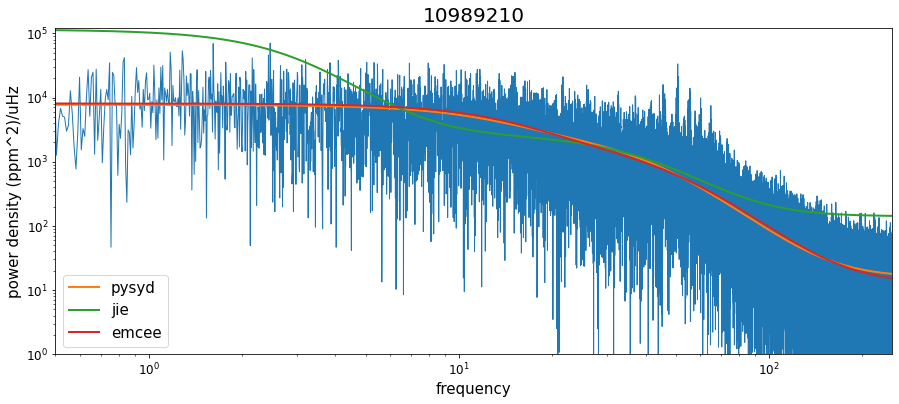

emcee fit:
           param         value       error
0          amp1  16475.043243  881.282470
1      nu_char1      9.503445    0.520271
2          amp2   2884.484651  187.359774
3      nu_char2     45.477130    0.842843
4            wn     44.850990    0.486289
5        pe_amp    579.359226   39.679402
6         numax     48.817666    0.789334
7      pe_width      9.879261    0.744980
8  smooth_numax     52.090233         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.99727460e+03 8.09827300e+04 8.09827300e+04 4.54111097e+01
 2.38415532e+00 2.38330857e+00 4.27645200e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [13664.5037776739, 7.663273423770784, 4067.8147916876687, 40.41187446849428, 47.85447709498517]
Pysyd numax: 49.83912925020441
Jie numax: 47.12
Emcee numax: 48.81766627318367


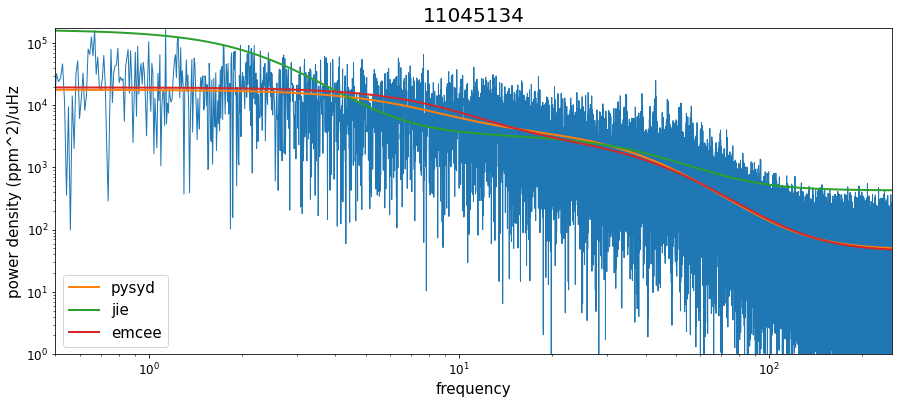

emcee fit:
           param         value        error
0          amp1  16703.120274  1368.589045
1      nu_char1      6.234833     0.652380
2          amp2   5655.822638   397.020163
3      nu_char2     30.252138     0.532902
4            wn     22.122689     0.230395
5        pe_amp   2462.407700   116.297606
6         numax     35.150069     0.299742
7      pe_width      6.323067     0.240684
8  smooth_numax     37.040894          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [5.35388440e+03 6.16986180e+04 7.63555660e+01 3.04508442e+01
 3.11657696e+00 5.12955881e+00 2.27430630e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [11635.215176268526, 6.84666511625224, 6031.767831472023, 28.88286372277714, 24.446851692352112]
Pysyd numax: 33.758689409239416
Jie numax: 34.52
Emcee numax: 35.15006865938041


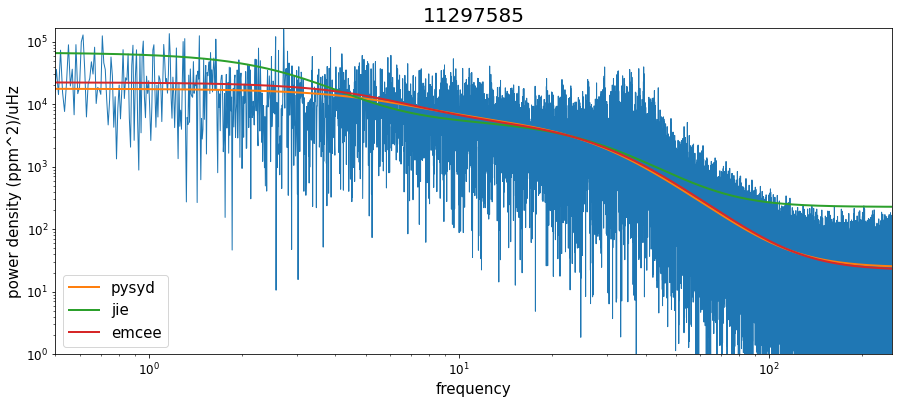

emcee fit:
           param        value       error
0          amp1  7404.494788  406.400345
1      nu_char1    17.037345    1.081590
2          amp2  1686.918418  278.635630
3      nu_char2    52.392751    2.138163
4            wn    15.175858    0.314974
5        pe_amp  1261.692148   58.195991
6         numax    56.362448    0.556271
7      pe_width     9.460198    0.368652
8  smooth_numax    61.157617         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.58563740e+03 1.21865360e+04 1.22825680e+02 4.31650310e+01
 6.44272817e-01 3.38510800e+00 1.73514230e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6009.344791215811, 16.40237884028534, 2308.9707923190927, 45.60265781848286, 18.803649262682324]
Pysyd numax: 59.048190551181605
Jie numax: 59.15
Emcee numax: 56.36244807608837


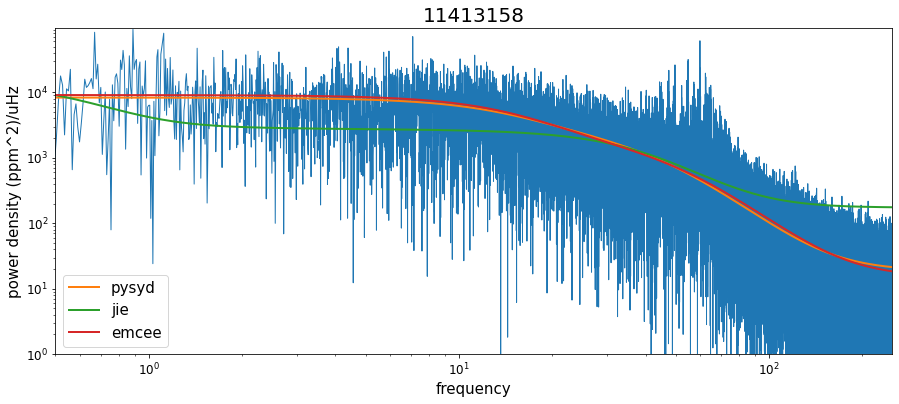

emcee fit:
           param         value        error
0          amp1  51217.188214  3522.199006
1      nu_char1      6.343148     0.428674
2          amp2  14987.678893  1926.832681
3      nu_char2     21.074788     0.704361
4            wn     61.619208     0.504149
5        pe_amp   9000.081568   523.684690
6         numax     22.798883     0.291569
7      pe_width      4.138572     0.216083
8  smooth_numax     24.063248          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [1.86678410e+04 4.41839430e+05 1.23071560e+02 1.90072249e+01
 2.53430454e+00 4.60018800e+00 4.65529420e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [51853.35111111123, 6.177607171840421, 15021.398445479283, 20.953258723386348, 60.417964568876044]
Pysyd numax: 23.65191047758101
Jie numax: 23.13
Emcee numax: 22.79888298730946


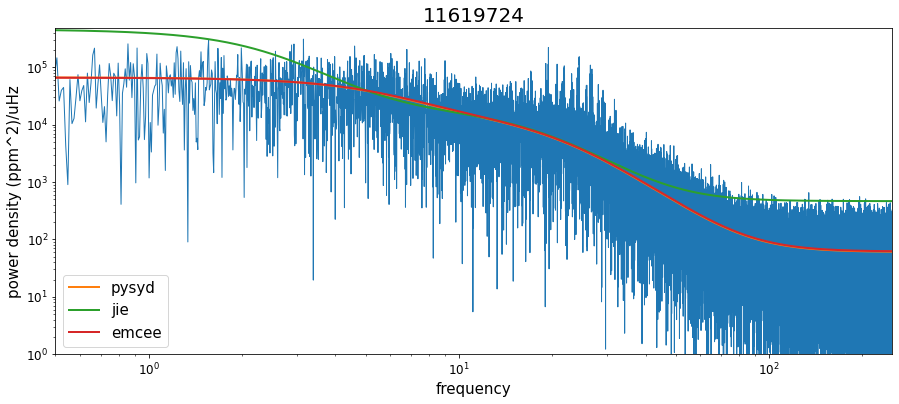

emcee fit:
           param        value       error
0          amp1  8393.623761  333.544280
1      nu_char1    15.870446    0.683038
2          amp2  1450.754257  213.659928
3      nu_char2    53.593200    2.114430
4            wn    20.359437    0.325502
5        pe_amp  1087.647022   46.280448
6         numax    52.030890    0.531544
7      pe_width    10.284208    0.375048
8  smooth_numax    57.505474         NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [2.43481190e+03 5.20854760e+04 1.02954630e+02 4.34846777e+01
 2.31521505e+00 2.72737431e+01 1.63521860e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [6624.772146280575, 15.05314946523463, 2118.221466136098, 45.864323050212406, 24.796591208316816]
Pysyd numax: 54.38069006393406
Jie numax: 54.29
Emcee numax: 52.03088976934972


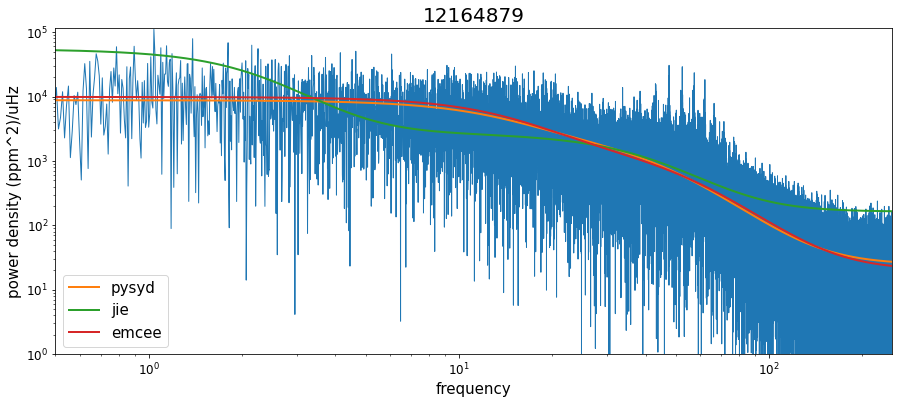

emcee fit:
           param         value        error
0          amp1  10142.926126   910.114732
1      nu_char1     10.543239     4.571080
2          amp2   3859.812810  1079.548341
3      nu_char2     45.528451     1.064189
4            wn     82.692630     4.816876
5        pe_amp   1517.520390   850.334964
6         numax     54.411954    23.672326
7      pe_width      8.145156     2.898455
8  smooth_numax     59.386640          NaN
Jie fit (a,a,a,1/b,1/b,1/b):
 [3.49129150e+03 1.36841810e+02 1.36841810e+02 4.11370579e+01
 5.64714758e-01 1.85590387e+00 3.20743680e+02]
pysyd fit (a,1/b,a,1/b,wn):
 [8645.49225414372, 14.46248265794694, 2969.9769679159385, 44.25617112127006, 87.87697462861858]
Pysyd numax: 56.26972713527562
Jie numax: 56.32
Emcee numax: 54.41195368937672


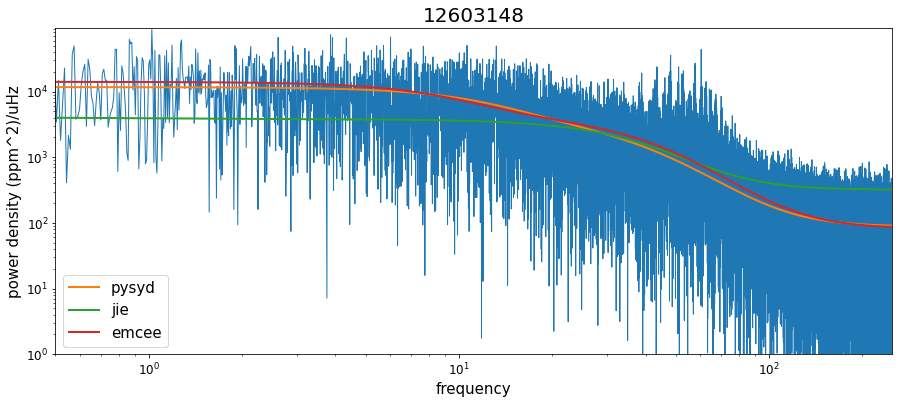

In [107]:
emcee_numax = []
pysyd_numax = []
jie_numax = []
for i in range(0,len(emcee_list)):
    star_name = str(emcee_list[i])
    powerspec = pd.read_csv('../data/bgfitting_PSDs/KIC'+star_name+'_PS.csv')
#     print(powerspec)

    emcee = pd.read_csv('../data/emcee_fits/KIC'+star_name+'.csv',names=['param','value','error'])
    print('emcee fit:\n',emcee)
    emcee_numax.append(emcee['value'][6])
    
    seis_file = open('../data/JieBGfits/'+star_name+'.seis','r') #2158410
    seis_file_read = seis_file.readlines()
    key_line = seis_file_read[9]
    data_line = seis_file_read[10]
#     print(data_line.split())
    seis_file.close()
    bg_params = data_line.split()
    white = float(bg_params[-2])
    a_list = []
    b_list = []
    for x in range(0,3):
        a = float(bg_params[2*x+1])
        b = float(bg_params[(2*x)+1+(2*3)])
        a_list.append(a)
        b_list.append(1/b)
    jie_bg = np.append((np.concatenate((a_list,b_list))),white)
#     print(a_list,b_list,white)
    print('Jie fit (a,a,a,1/b,1/b,1/b):\n',jie_bg)
    jie_numax.append(highmass_rc_newvals['numax'][highmass_rc_newvals['KIC']==float(star_name)].values[0])

    pysyd_file = pd.read_csv('../pysyd-work/results/'+star_name+'/global_1.csv')
    a1 = pysyd_file['value'][6]*pysyd_file['value'][7]**2*4*1e-6
    b1 = pysyd_file['value'][6]*2*np.pi*1e-6
    a2 = pysyd_file['value'][9]*pysyd_file['value'][10]**2*4*1e-6
    b2 = pysyd_file['value'][9]*2*np.pi*1e-6
    white = pysyd_file['value'][8]
#     print(a1,1/b1,a2,1/b2,white)
    pysyd_bg = [a1,1/b1,a2,1/b2,white]
    print('pysyd fit (a,1/b,a,1/b,wn):\n',pysyd_bg)
    pysyd_numax.append(pysyd_file['value'][0]) #could use 2 for the gaussian one
    
    print('Pysyd numax:',pysyd_numax[i])
    print('Jie numax:',jie_numax[i])
    print('Emcee numax:',emcee_numax[i])
    
    ########################## plot everything ##################################
    plt.figure(figsize=(15,6))
    plt.plot(powerspec['freq'],powerspec['power'])

    pysydharvey = harvey_emcee(powerspec['freq'],pysyd_bg[0],pysyd_bg[1]) + \
                                harvey_emcee(powerspec['freq'],pysyd_bg[2],pysyd_bg[3]) + pysyd_bg[-1]
    plt.plot(powerspec['freq'],pysydharvey,label='pysyd',linewidth=2)

    jieharvey = harvey_emcee(powerspec['freq'],jie_bg[0],jie_bg[3]) + \
                    harvey_emcee(powerspec['freq'],jie_bg[1],jie_bg[4]) + \
                    harvey_emcee(powerspec['freq'],jie_bg[2],jie_bg[5]) + jie_bg[6]
#     for i in range(1,len(tau_list)):
#         jieharvey = jieharvey + harvey_tau(powerspec['freq'],tau_list[i],sigma_list[i])
#     jieharvey = jieharvey + float(bg_params[-2])
    plt.plot(powerspec['freq'],jieharvey,label='jie',linewidth=2)

    emcee_harvey = harvey_emcee(powerspec['freq'],emcee['value'][0],emcee['value'][1]) + \
                    harvey_emcee(powerspec['freq'],emcee['value'][2],emcee['value'][3]) + \
                    emcee['value'][4]
    plt.plot(powerspec['freq'],emcee_harvey,label='emcee',linewidth=2)

    # pysydharvey_old = harvey_emcee(powerspec['freq'],aa1,bb1) + harvey_emcee(powerspec['freq'],aa2,bb2)
    # plt.plot(powerspec['freq'],pysydharvey_old*110.079,linestyle=':',label='pysyd_old')

    # plt.xlim(0,100)
    plt.xlim(0.5,250)
    # plt.xlim(10,200)
    # plt.xlim(20,80)
    plt.ylim(bottom=1)
    plt.title(star_name,fontsize=20)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('frequency')
    plt.ylabel('power density (ppm^2)/uHz')
    plt.legend(loc='lower left',fontsize=15)
    # plt.savefig('../bg_powerdensity')
    plt.show()
pysyd_numax = np.asarray(pysyd_numax)
jie_numax = np.asarray(jie_numax)
emcee_numax = np.asarray(emcee_numax)

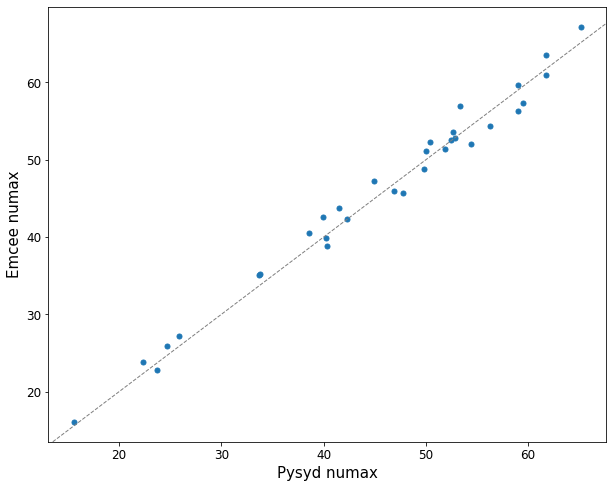

In [108]:
plt.scatter(pysyd_numax,emcee_numax)
plt.axline((20, 20), slope=1,color='grey',linestyle='--')
plt.xlabel('Pysyd numax')
plt.ylabel('Emcee numax')
plt.show()

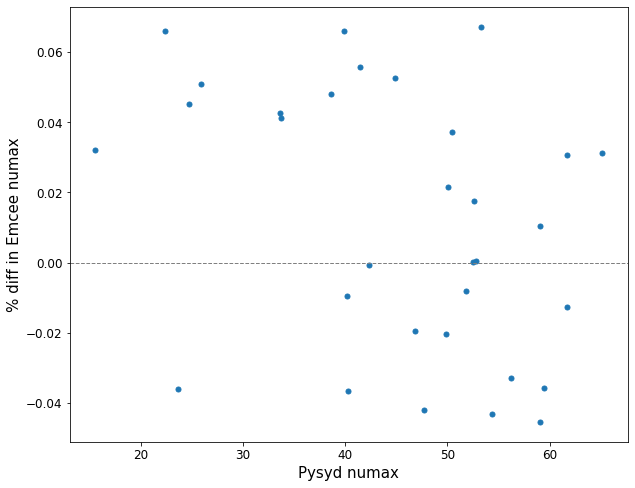

In [114]:
plt.scatter(pysyd_numax,(emcee_numax-pysyd_numax)/pysyd_numax)
# plt.axline((20, 20), slope=1,color='grey',linestyle='--')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Pysyd numax')
plt.ylabel('% diff in Emcee numax')
plt.show()

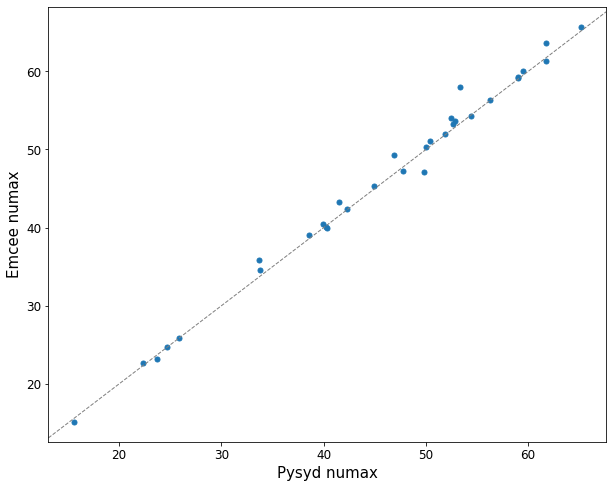

In [115]:
plt.scatter(pysyd_numax,jie_numax)
plt.axline((20, 20), slope=1,color='grey',linestyle='--')
plt.xlabel('Pysyd numax')
plt.ylabel('Emcee numax')
plt.show()

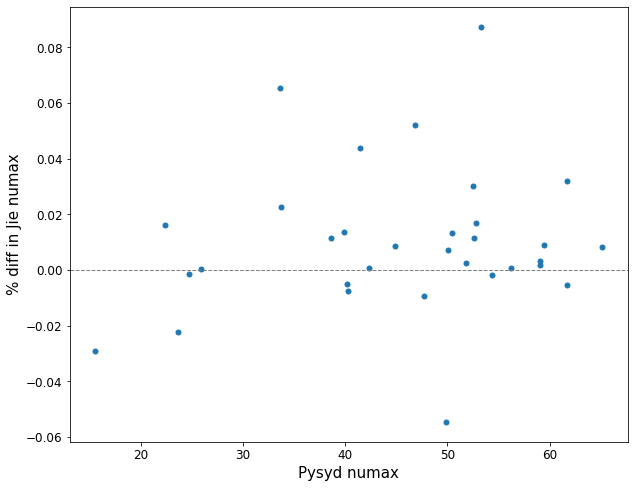

In [116]:
plt.scatter(pysyd_numax,(jie_numax-pysyd_numax)/pysyd_numax)
# plt.axline((20, 20), slope=1,color='grey',linestyle='--')
plt.axhline(0,color='grey',linestyle='--')
plt.xlabel('Pysyd numax')
plt.ylabel('% diff in Jie numax')
plt.show()